# Window Management

Screen resolution can impact how your web application renders, so `WebDriver` provides mechanisms for moving and resizing the browser window.

**Get window size**: Fetches the size of the browser window in pixels.

```
# Access each dimension individually

width = driver.get_window_size().get("width")
height = driver.get_window_size().get("height")

# Or, store the dimensions and query them later

window_size = driver.get_window_size()
width = window_size.get("width")
height = window_size.get("height")
```

**Set window size**: Restores the window and sets the window size.

```
driver.set_window_size(1024, 768)
```

**Get window position**: Fetches the coordinates of the top left coordinate of the browser window.

```
# Access each dimension individually

x_coordinate = driver.get_window_position().get("x")
y_coordinate = driver.get_window_position().get("y")

# Or, store the dimensions and query them later

window_size = driver.get_window_position()
x_coordinate = window_size.get("x")
y_coordinate = window_size.get("y")
```

**Set window position**: 
Moves the window to the chosen position.

```
# Move the window to the top left of the primary monitor

driver.set_window_position(0,0)
```

**Maximise window**:
* Enlarges the window. 
* For most operating systems, the window will fill the screen, without blocking the operating system’s own menus and toolbars.

```
driver.maximize_window()
```

**Minimize window**:
* Minimizes the window of current browsing context.
* The exact behaviour of this command is specific to individual window managers.
* Minimize Window typically hides the window in the system tray.
* **Note**: This feature works with Selenium 4 and later versions.

```
driver.minimize_window()
```

**Fullscreen window**: Fills the entire screen, similar to pressing `F11` in most browsers.

```
driver.fullscreen_window()
```

**TakeScreenshot**:
* Used to capture screenshots for current browsing context.
* The `WebDriver` endpoint screenshot returns a screenshot which is encoded in Base64 format. 

```
# Return the screenshot of the image as Base64 encoded string
driver.save_screenshot('screenshot.png')

# Gets the screenshot of the current window as a binary data.
image_bytes = driver.get_screenshot_as_png()
print("Binary image data: ", image_bytes)

# Saves a screenshot of the current window to a PNG image file.
# Returns False if there is any IOError, else returns True.
# Use full paths in your filename.
driver.get_screenshot_as_file('screenshot_file.png')

# Gets the screenshot of the current window as a base64 encoded string which is useful in embedded images in HTML
image_base64_str = driver.get_screenshot_as_base64()
print("Base64 encoded string: ", image_base64_str)
```


# Handling windows & tabs

It’s rare for a modern web application not to have any frames or to be constrained to a single window. 

When we have multiple windows in any web application, the activity may need to switch control among several windows from one to another, in order to complete the operation. After completion of the operation, it has to return to the **main window** `i.e.` **parent window**. 

WebDriver supports moving between **named windows** using the **`switch_to.window()`** method:
```
driver.switch_to.window("windowName")
```

All calls to driver will now be interpreted as being directed to the particular window. 
* **But how do you know the window’s name?** 
* Take a look at the javascript or link that opened it.

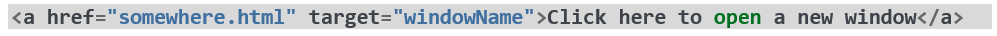

> Alternatively, you can pass a **“window handle”** to the `switch_to.window()` method.

## Window handle

**What is a window handle?** 
* A window handle is a **unique identifier** that holds the address of the window. 
* This is a pointer to a window, which is a string value. 
* **`WebDriver`** provides a property called **`window_handles`** that returns the handles of all windows within the current session.
* It is guaranteed that each window will have a unique window handle.
* Using these window handles, **`WebDriver`** can easily switch control from one window to another.

**Example**:
```
# returns a list of strings: each string is a unique window handle.
handles = driver.window_handles

for handle in handles:
    driver.switch_to.window(handle)
```

## Get window handle(s)

* **`WebDriver`** does not make the distinction between windows and tabs.
* If your site opens a new tab or window, Selenium will let you work with it using a window handle. 
* Each window has a unique identifier that remains persistent in a single session. 

You can get the window handle of the current window as a String by using: 
```
curent_window_handle = driver.current_window_handle
```

You can get all the window handles for the current session as a list of String by using:
```
window_handles = driver.window_handles
```


## Closing a window/tab and switching back to parent window/tab

When you are finished with a window or tab and it is not the last window or tab open in your browser, you should close it and switch back to the window you were using previously. 

Assuming you followed the code sample in the previous section you will have the previous window handle stored in a variable. 

```
main_window = driver.current_window_handle

# switch to tab/window
window_handles = driver.window_handles
driver.switch_to.window(window_handles[1])
driver.close()

driver.switch_to.window(window_handles[0])   OR   driver.switch_to.window(main_window)
```

Forgetting to switch back to another window handle after closing a window will leave **`WebDriver`** executing on the now-closed page, and will trigger a **`NoSuchWindowException`**. 

You must switch back to a valid window handle in order to continue execution.


# Handling iframe

**iFrame** is a web page or an inline frame that is embedded in another web page or an HTML document embedded inside another HTML document. The **iframe** is often used to add content from other sources like an advertisement into a web page. The **iframe** is defined with the **`<iframe>`** tag.

**How to identify the **iframe**?**
* We cannot detect the frames by just seeing the page or by inspecting Firebug.
* Observe the below image, Advertisement being displayed is an Iframe, we cannot locate or recognize that by just inspecting using Firebug.
* So the question is *how can you identify the iframe?*

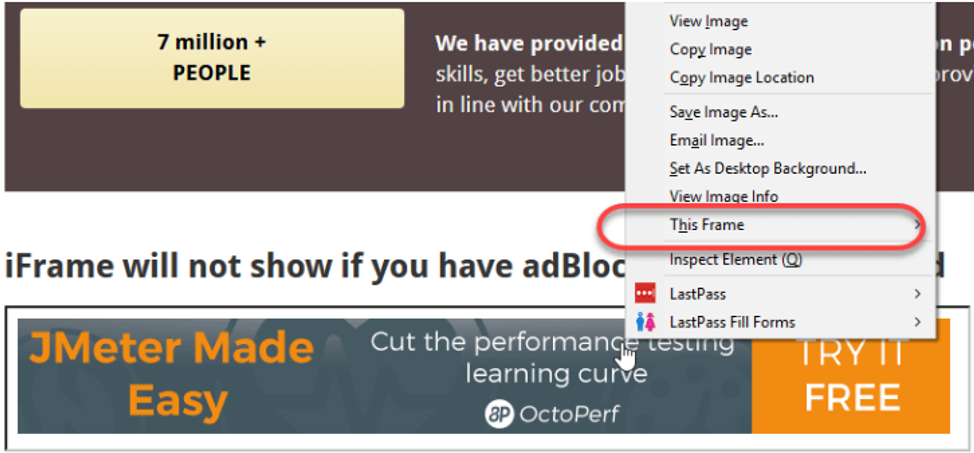

We can identify the iframes using the methods given below:
* Right-click on the element, If you find an option like **`'This Frame'`** then it is an **iframe**.(Please refer to the above diagram)
* Right-click on the page, click **'View Page Source'**, and Search with the **'iframe'**, if you can find any tag name with the **`'iframe'`** then it means, the page consisting an **iframe**.

In the above diagram, you can see that **`This Frame`** option is available upon right-clicking, so we are now sure that it is an iframe.

**We can even identify the total number of iframes by using below snippet**.
```
iframes = driver.find_elements(By.TAG_NAME,"iframe")
iframes_count = len(iframes)
```

## Switching to iFrame

Consider a button within an **iframe**. If we inspect the element using the browser development tools, we might see the following:

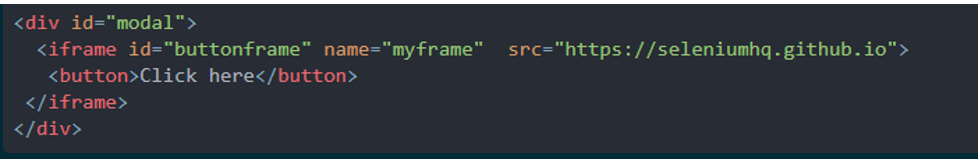

If it was not for the **iframe** we would expect to click on the button using something like:

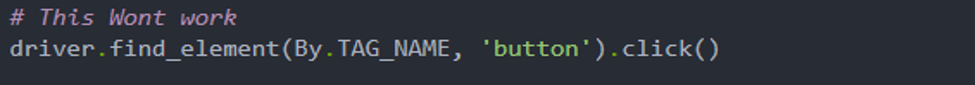

* However, if there are no buttons outside of the iframe, you might instead get a **`NoSuchElementException`**. 
* This happens because Selenium is only aware of the elements in the top-level document. 
* To interact with the button, we will need to first switch to the frame, in a similar way to how we switch windows. 

WebDriver offers three ways of switching to a frame:
1. Using WebElement
2. Using name or ID
3. Using an Index

**Using WebElement**
```
# Store iframe web element
iframe = driver.find_element(By.CSS_SELECTOR,"#modal > iframe")

# Switch to the selected iframe
driver.switch_to.frame(iframe)

# Now click on the button
driver.find_element(By.TAG_NAME,"button").click()
```

**Using name or ID**
```
# Switch to the frame by id
driver.switch_to.frame("buttonframe")

# Now click on the button
driver.find_element(By.TAG_NAME,"button").click()
```

**Using an Index**
```
# Switch to the frame by index
driver.switch_to.frame(1)

# Now click on the button
driver.find_element(By.TAG_NAME,"button").click()
```

**How to switch over the frame, if we **CANNOT** switch using `ID` or `WebElement`?**

Suppose there are 100 frames on the page, and there is no **ID** available, in this case, we just don't know from which iframe the required element is being loaded (in this case we do not know the index of the frame also).

The solution for the above concern is, we must find the index of the iframe through which the element is being loaded and then we need to switch to the iframe through the index.

## Switching back to default or parent frame

To leave an iframe or frameset, switch back focus to the default frame like so:

```
# switch back to default frame
driver.switch_to.default_content()
```

Switches focus on the parent context. If the current context is the top-level browsing context, the context remains unchanged.
```
# switch back to parent frame
driver.switch_to.parent_frame()
```


## Concept of Nested Frames (Frames inside Frames)

Let's assume that there are two frames one inside another as shown in the below image and our requirement is printing the text in the **outer** frame and **inner** frame. 

In the case of nested frames,
* At first, we must switch to the **outer** frame by either the **Index** or **ID** of the **iframe**.
* Once we switch to the **outer** frame, we can find the total number of **iframes** inside the **outer** frame.
* We can then switch to the **inner** frame by any of the known methods.

While exiting out of the frame, we must exit out in the reverse order as we entered it, from the **inner** frame first and then the **outer** frame.

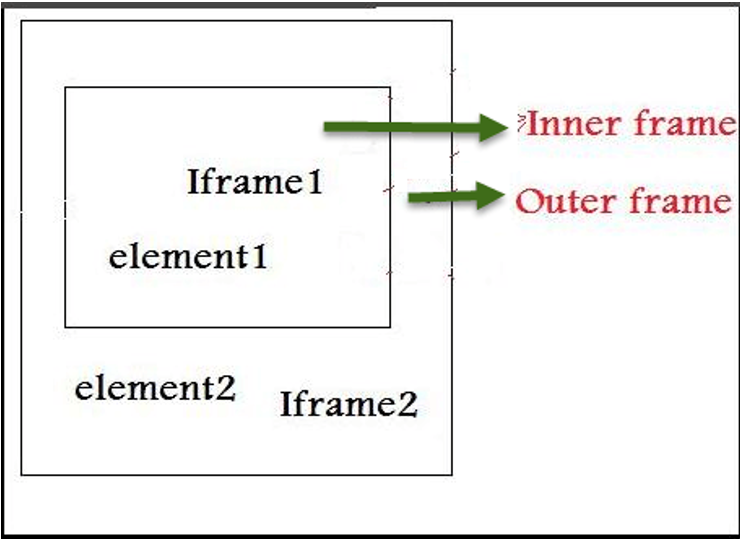

The HTML code for the above-nested frame is shown below.

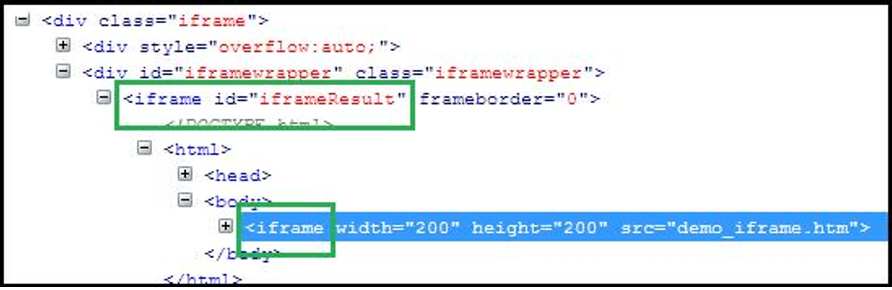

The above HTML code clearly explains the **iframe tag** (highlighted in green) within another **iframe tag**, indicating the presence of **nested iframes**.

**`Step 1`:** Switching to the **outer frame** and printing the text on **outer frame**.
* Switch to the **outer frame**.
* Prints the text on the **outer frame**.

**`Step 2`**: Once we switch to the **outer frame**, we should know whether any inner frame present inside the **outer frame**.
* Finds the total number of **iframes** inside the **outer frame**.
* If size was found **`0`** that means there is no **inner frame** inside the frame.

**`Step 3`**: Switching to the **inner frame** and printing the text on **inner frame**.
* Switch to the **inner frame**.
* Prints the text on the **inner frame**.


## Access subframe directly

* It’s possible to access subframes by separating the path with a dot, and you can specify the frame by its index too. 
* That is: **`driver.switch_to_frame("frameName.0.child")`** would go to the frame named **“child”** of the first subframe of the frame called **“frameName”**.
* **All frames are evaluated from top-to-bottom**.
* Once we are done working on frames, we will have to come back to the parent frame which can be done using: **`driver.switch_to_default_content()`**
